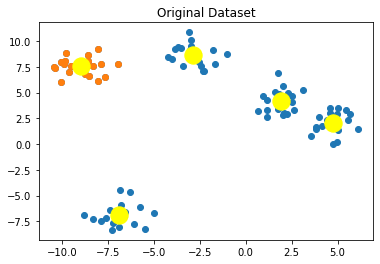

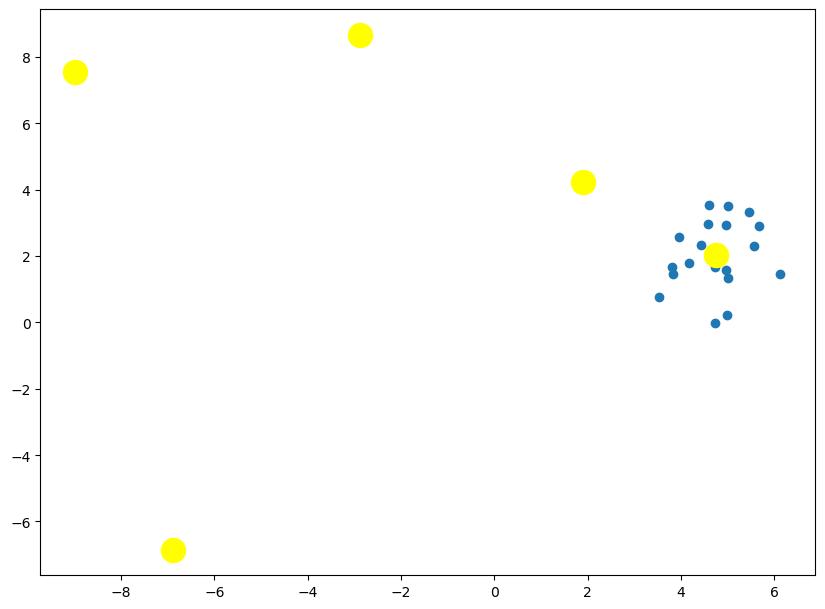

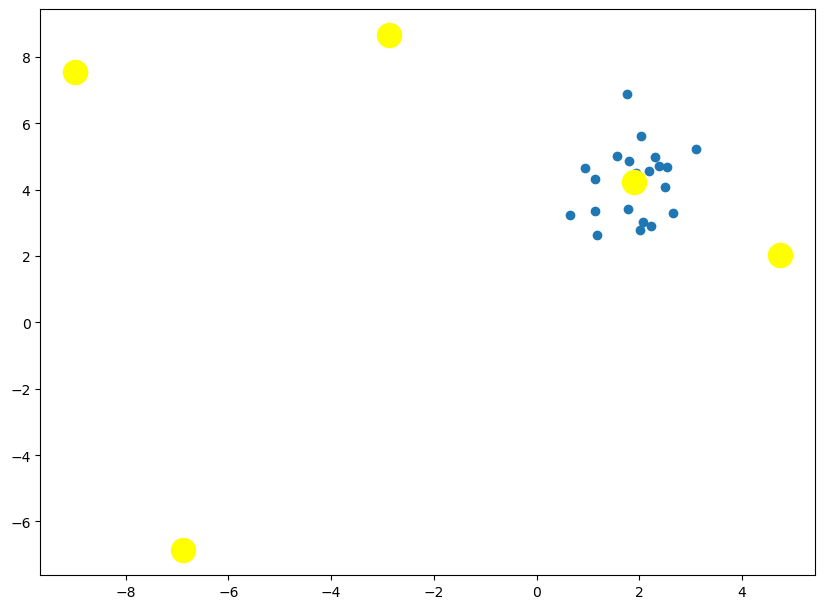

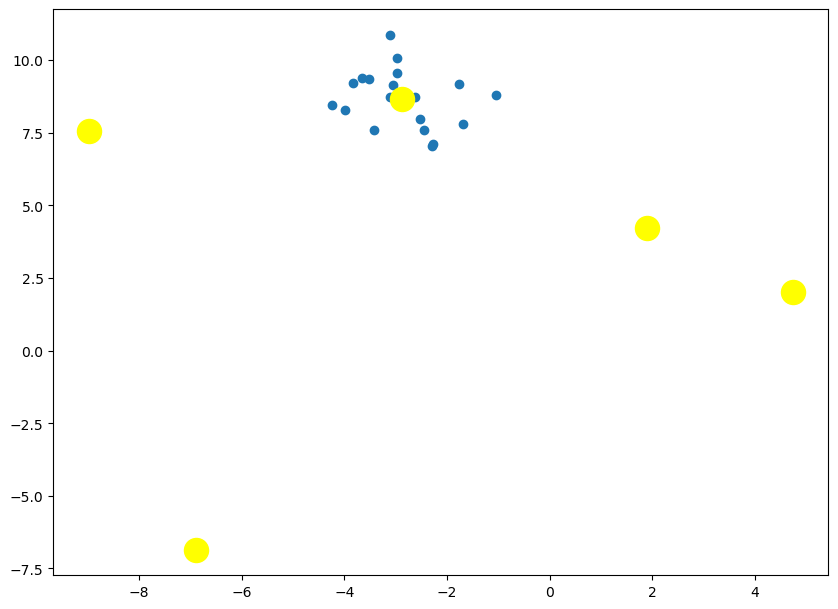

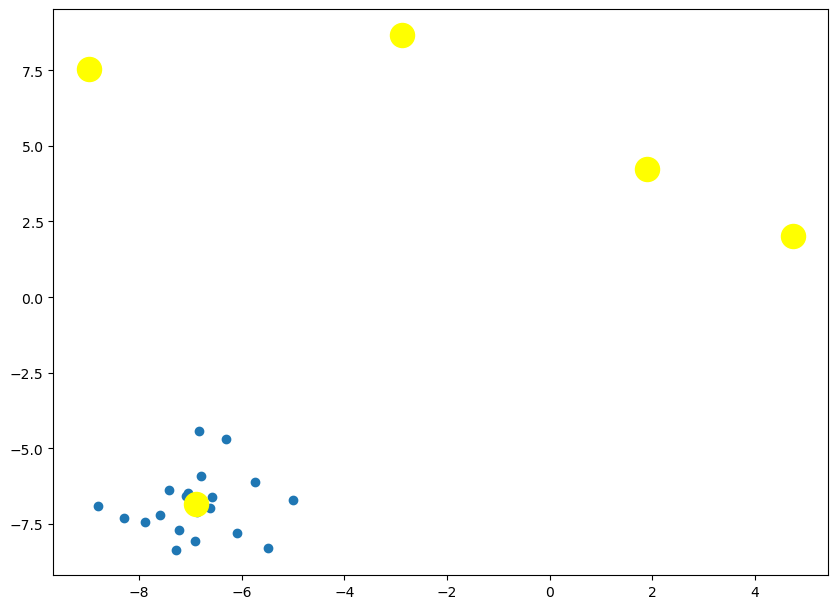

In [6]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import random

# using make_blobs to generate isotropic gaussian blobs to use for clustering
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=5, random_state=42)

# set number of training sample
m = X.shape[0]  # 100
n = X.shape[1]  # 2
n_iter = 50

k = 5

# empty centroid array
centroids = np.array([]).reshape(n, 0)

# 5 random centroids are initialized
for c in range(k):
    centroids = np.c_[centroids, X[random.randint(0, m - 1)]]

output = {}

# creating an empty array
euclid = np.array([]).reshape(m, 0)

# euclidean distance between each instance and centroid
for e in range(k):
    dist = np.sum((X - centroids[:, e]) ** 2, axis=1)
    euclid = np.c_[euclid, dist]

# we need the min distance for each instance to assign to clusters
minimum = np.argmin(euclid, axis=1) + 1

# compute mean of separated clusters
cent = {}
for e in range(k):
    cent[e+1] = np.array([]).reshape(2, 0)

# assign points to clusters
for i in range(m):
    cent[minimum[i]] = np.c_[cent[minimum[i]], X[i]]
for j in range(k):
    cent[j+1] = cent[j+1].T

# compute mean and update it
for i in range(k):
    centroids[:, i] = np.mean(cent[i+1], axis=0)

# repeat calculation of euclidean distance, cluster mean, assign cluster and update cluster until convergence
for i in range(n_iter):
    euclid=np.array([]).reshape(m, 0)
    for p in range(k):
        dist = np.sum((X - centroids[:, p])**2, axis=1)
        euclid = np.c_[euclid, dist]

    C = np.argmin(euclid, axis=1)+1
    cent = {}
    for e in range(k):
        cent[e+1] = np.array([]).reshape(2, 0)
    for n in range(m):
        cent[C[n]] = np.c_[cent[C[n]], X[n]]
    for c in range(k):
        cent[c+1] = cent[c+1].T
    for j in range(k):
        centroids[:, j] = np.mean(cent[j+1], axis=0)
    final = cent

plt.scatter(X[:,0],X[:,1])
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('Original Dataset')

for u in range(k):
    plt.scatter(final[u+1][:,0],final[u+1][:,1])
    plt.scatter(centroids[0,:],centroids[1,:],s=300,c='yellow')
    plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
    plt.show()
